### Dataset: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [23]:
import numpy as np

In [4]:
df = pd.read_csv('adult.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
# Fetch random sample from dataset (50%)
df1 = df.sample(frac=0.50)
df1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
14136,46,Private,147519,Some-college,10,Divorced,Sales,Not-in-family,White,Female,0,0,80,United-States,<=50K
10738,23,State-gov,251325,Some-college,10,Never-married,Sales,Not-in-family,Asian-Pac-Islander,Female,0,0,8,?,<=50K
37288,61,Private,101265,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,43,United-States,<=50K
11760,65,Private,274637,9th,5,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,16,United-States,<=50K
9091,48,?,155509,11th,7,Divorced,?,Unmarried,Black,Female,0,0,10,Haiti,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35611,48,Private,155659,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
46939,42,Private,79036,HS-grad,9,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3997,68,?,150250,Masters,14,Married-civ-spouse,?,Husband,White,Male,0,1510,30,United-States,<=50K
41594,47,Private,185866,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,?,>50K


In [16]:
# Check for nulls
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [22]:
# Data cleaning [Replace '?' with NaN]

# Find where the '?' mark is prevelant
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [25]:
df[['workclass','occupation','native-country']] = df[['workclass','occupation','native-country']].replace('?',np.NaN)

In [26]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<AxesSubplot:>

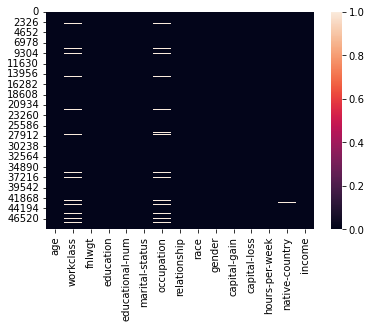

In [28]:
# Visualize current nulls in dataset
sns.heatmap(df.isnull())

In [29]:
# Drop all missing values

# Check missing values in percentage
pct_null = df.isnull().sum()*100/len(df)
pct_null

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [32]:
df.dropna(how='any',inplace=True)

In [36]:
pct_missing_new = df.isnull().sum()*100/len(df)
pct_missing_new

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [37]:
# Check for and drop duplicate data
dup = df.duplicated().any()
dup

True

In [38]:
df = df.drop_duplicates()

In [43]:
# Obtain statistics for dataset
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [44]:
# Drop redundant columns education-num, capital-gain, capital-loss
df = df.drop(['educational-num','capital-gain','capital-loss'], axis=1)

In [46]:
# Verify drops
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

### Univariate Analysis

In [48]:
# What is the distribution of ages
df['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:>

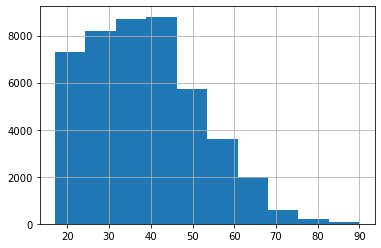

In [50]:
df['age'].hist()

In [51]:
# Find total number of people between ages 17-48 (inclusive)
sum((df['age']>=17) & (df['age']<=48))

34858

In [53]:
sum(df['age'].between(17,48))

34858

<AxesSubplot:>

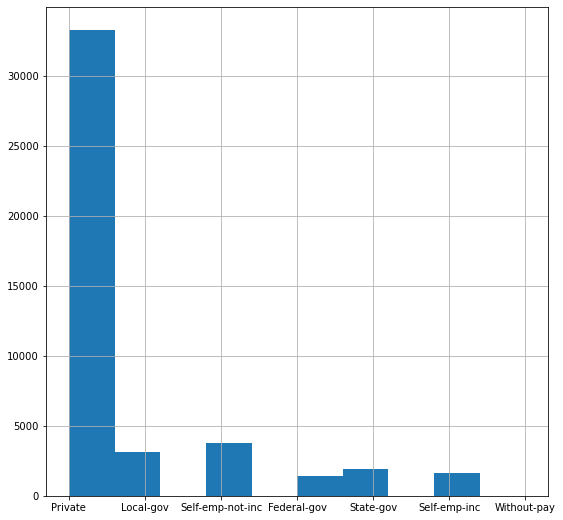

In [55]:
# Review distribution of work classes

plt.figure(figsize=(9,9))
df['workclass'].hist()

In [57]:
# Find number of people with either Masters or Bachelors degree
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [61]:
filter1 = df['education']=='Masters'
filter2 = df['education']=='Bachelors'

In [64]:
len(filter1|filter2)

45175

In [66]:
# A more Pythonic way to do the above:
df['education'].isin(['Masters','Bachelors']).count()

45175

### Bivariate Analysis

<AxesSubplot:xlabel='income', ylabel='age'>

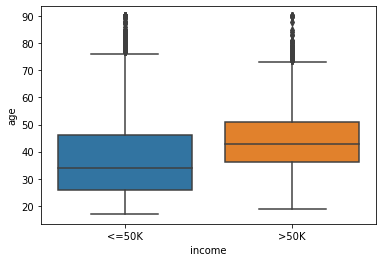

In [68]:
# Find relationship b/w salary and age
sns.boxplot(x='income', y='age', data=df)

In [76]:
# Create column with boolean valueus for income
df['income'].value_counts()

<=50K    33973
>50K     11202
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

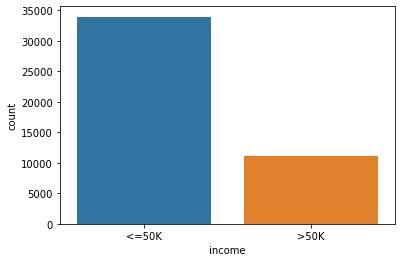

In [72]:
sns.countplot('income', data=df)

In [73]:
def income_converter(sal):
    if sal == '<=50K':
        return 0
    else:
        return 1

In [74]:
df['encoded_salary'] = df['income'].apply(income_converter)

In [75]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,encoded_salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,0


In [77]:
# Replace salary values ['<=50K', '>50K'] with boolean values
df.replace(to_replace=['<=50K', '>50K'], value=[0,1], inplace=True)

In [78]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,encoded_salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0,0


In [80]:
# Find work class getting the highest salary
df.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income, dtype: float64

In [83]:
# Find which gender has greater chance of getting salary = >50K
df.groupby('gender')['income'].mean().sort_values(ascending=False)

gender
Male      0.312609
Female    0.113692
Name: income, dtype: float64

In [84]:
# Convert 'workclass' column datatype to category
df['workclass'].info()

<class 'pandas.core.series.Series'>
Int64Index: 45175 entries, 0 to 48841
Series name: workclass
Non-Null Count  Dtype 
--------------  ----- 
45175 non-null  object
dtypes: object(1)
memory usage: 705.9+ KB


In [86]:
df['workclass'] = df['workclass'].astype('category')

In [87]:
df['workclass'].info()

<class 'pandas.core.series.Series'>
Int64Index: 45175 entries, 0 to 48841
Series name: workclass
Non-Null Count  Dtype   
--------------  -----   
45175 non-null  category
dtypes: category(1)
memory usage: 397.4 KB
